# Exploring the Pokemon Dataset

#### **SETUP**

In [197]:
#importing relevant modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **CHECKING INPUT DATA**

In [198]:
#Reading the csv file and printing first few rows of data
data = pd.read_csv('pokemon.csv')

#Let's work with a copy of the data.
df = data.copy()
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Okay do there's inconcsistencies with the 'Name' and '#' columns. The name after Venusaur looks sus and also has the wrong value in the '#' column.

Hmm. We'll check out the 'Name' and the '#' columns and see if this is something that's happening throughout. We'll get to formatting them once we do some preliminary checks.

#### **CHECKING FOR DUPLICATES**

In [199]:
df.loc[df.duplicated()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


In [200]:
df.loc[df.duplicated('Name')]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


Great! Looks like there aren't any duplicate rows in the data.

#### **CHECKING DATA TYPES**

In [201]:
#Info on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Nice! The data types are all okay.

#### **LOOKING FOR NULL VALUES**

In [202]:
#Check to see if there are any null values
df .isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Okay. So the 'Type 2' column has some null values. Let's see what to do with them in a while. In order ot have a cleaner dataframe to work with, let's ust go ahead and fix the '#' and 'Name' columns first.

#### **FIXING THE '#' COLUMN**

It looks like this column is just meant to serve as an index and nothing else. But, it has wrong values for many rows where the number repeats. Since it doesn't serve any other purpose or has any bearing on our data, it is safe to just drop it.

In [203]:
#Dropping '#' column
df = df.drop('#', axis = 1)

#Check to see if the columns is dropped
#df

Nice. Let's now fix the 'Name' column.

#### **WORKING WITH 'NAME' COLUMN**

In [204]:
#Display all row instead of just the first and last few
#pd.set_option('display.max_rows', None)

#Checking out the 'Name and '#' column values
#print(df['Name'])

Okay. Clearly, the names have issues in them. And it seems to be specifically ones with two words in them.

Let's just look at all names which have two words in them. And then, we'll see how to procees.

In [205]:
#Seeing all the problem names in them (ones with two words)
#df.loc[df['Name'].str.contains( pat = r'(\w+) (\w+)', regex = True)]

Awesome. Right off the bat, we see that all Pokemon with 'Mega' in their name have a redundant name at the beginning. Let's remove that.

In [206]:
#Removing redundant name in names with 'Mega'
df['Name'] = df['Name'].replace(to_replace = r'(\w+)(Mega)',value = r'\2', regex = True)

#Check to see if all of them are fixed
#df.loc[df['Name'].str.contains('Mega')]

In [207]:
#Looking up the column again to see what to fix next
#df['Name']

Great! The 'Mega' Pokemon are all good. 

On scrolling through the 'Name' column, we also see that two Pokemon with 'Primal' in their name have the same issue. Let's fix that up too.

In [208]:
#Removing redundant name in names with 'Primal'
df['Name'] = df['Name'].replace(to_replace = r'(\w+)(Primal)', value = r'\2', regex = True)

#Check to see if all of them are fixed
#df.loc[df['Name'].str.contains('Primal')]

Great! The 'Primal' Pokemon are fixed too.

Let's see what to do next.

In [209]:
#df['Name']

Okay. So there's one more Pokemon which seems to have it's name repeating at the beginning and the end - 'Rotom'. And it also seems like there are many Pokemon who's names have their first word as a concatenation of two words, alongwith one that has a concatenation of a word and some numbers (Zygarde50% Forme). 

Let's quickly fix the Rotoms up before moving on to split the names where there is a concatenation of words.

In [210]:
#Replace 
df['Name'] = df['Name'].replace(to_replace = r'(Rotom)([A-Z])', value = r'\2', regex = True)

#Check to see if this fixed all Rotom Pokemon names
#df.loc[df['Name'].str.contains('Rotom')]

Amazing!! Finally, let's fix those Pokemon who's first name is a concatenation of two words by adding a space in between them.

In [211]:
#Add space in between the words
df['Name'] = df['Name'].replace(to_replace = r'([a-z])([A-Z]|\d)', value = r'\1 \2', regex = True)

#Check the dataset
#df.loc[df['Name'].str.contains(r'([a-z]) ([A-Z]|\d)', regex = True)]

Oh it looks like there's another Pokemon with a duplicate name : 'Kyurem Black Kyurem' and 'Kyurem White Kyurem'. That needs fixing.

Also, after a quick internet search, apparently 'Hoopa Hoopa Confined' and 'Hoopa Hoopa Unbound' are just 'Hoopa Confined' and 'Hoopa Unbound'. 

Let's fix all this.

In [212]:
#Fixing Kyurem
df['Name'] = df['Name'].replace(to_replace = r'(Kyurem) ([A-Z])', value = r'\2', regex = True)

#Fixing Hoopa
df['Name'] = df['Name'].replace(to_replace = r'(Hoopa) (Hoopa)', value = r'\2', regex = True)

In [213]:
#Final look (hopefully)
#df

AMAZING! All Pokemon names have been fixed. We can move on now.

#### **FIXING NULL VALUES**

Let's go ahead and fix the null values in the 'Type 2' Column.

Oh okay. So after a quick internet search, apparently, Pokemon with two types are called 'Dual-type' Pokemon and the ones with a single type are called 'Pure-type' Pokemon. So, the ones with NaN in their 'Type 2' column are Pure-type pokemon. 

Okay so keeping that in mind, I'm actually going to leave the column as is and not think of filling up the null values. In case ther are issues later, I will come back to this and fill up the values accordingly.

You know what, let's also add a column that tells us what type (Dual Type/Pure Type) the Pokemon is.

In [214]:
#Initializing the 'Type' Column with 'Dual Type'
df.insert(1, 'Type', 'Dual Type')

#If 'Type 2' column is null, set 'Type' column to be 'Pure Type'
df.loc[df['Type 2'].isnull(), 'Type'] = 'Pure Type'

In [215]:
#Let's check the null values again
df.isnull().sum()

Name            0
Type            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [216]:
#Let's check all of the Pure type pokemon
df.loc[df['Type'] == 'Pure Type'].shape

(386, 13)

Awesome! We had 386 null values initially, and so, can infer that all of them have been ascribed to 'Pure Type' Pokemon.

#### **DATA STATS**

In [217]:
#Let's see the stats of the data
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Okay. So, we have a total of 800 Pokemon spanning 6 generations.

**DIFFERENT TYPES OF POKEMON**

In [218]:
#All Type 1 values
print(f'{df['Type 1'].unique()} : {len(df['Type 1'].unique())} types.')

#All Type 2 values
print(f'{df['Type 2'].unique()} : {len(df['Type 2'].unique())} types.')

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying'] : 18 types.
['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal'] : 19 types.


Looks like both Type 1 and Type 2 have similar types, except for the null values. Let's check that quickly.

If all the elements in 'Type 2' exist in 'Type 1' except for the null value, then we will be right. So, we'll look for all the values that are in Type 2 but not in Type 1. If we are right, it should return a list containing only a null.

In [219]:
#Check if all elements in Type 2 are in Type 1
print(df.loc[~df['Type 2'].isin(df['Type 1']), 'Type 2'].unique())

#Number of elements
print(len(df.loc[~df['Type 2'].isin(df['Type 1']), 'Type 2']))

[nan]
386


Cool! So we see that the 'Type 2' contains the same set of values as 'Type 1', but in a different order of course. THe only exceptions are the null values which correspond to the Pure-Type Pokemon, as we saw before.

From here on, let's work with the Dual type pokemon first, and then, the Pure type pokemon.

#### **DUAL TYPE POKEMON**

In [220]:
#Total number of each type of pokemon as per their Type 1
#df.loc[(df['Type'] == 'Dual Type'), ['Type 1']].value_counts()

In [221]:
#Total number of pokemon as categorised by both type 1 and type 2
#df.loc[(df['Type'] == 'Dual Type'), ['Type 1', 'Type 2']].value_counts()

In [222]:
#Verifying if the above output is correct
#df.loc[(df['Type'] == 'Dual Type') & (df['Type 1'] == 'Bug'), ['Type 1', 'Type 2']].value_counts().sum()

#### **VISUALIZING THE DIFFERENT TYPES OF POKEMON**

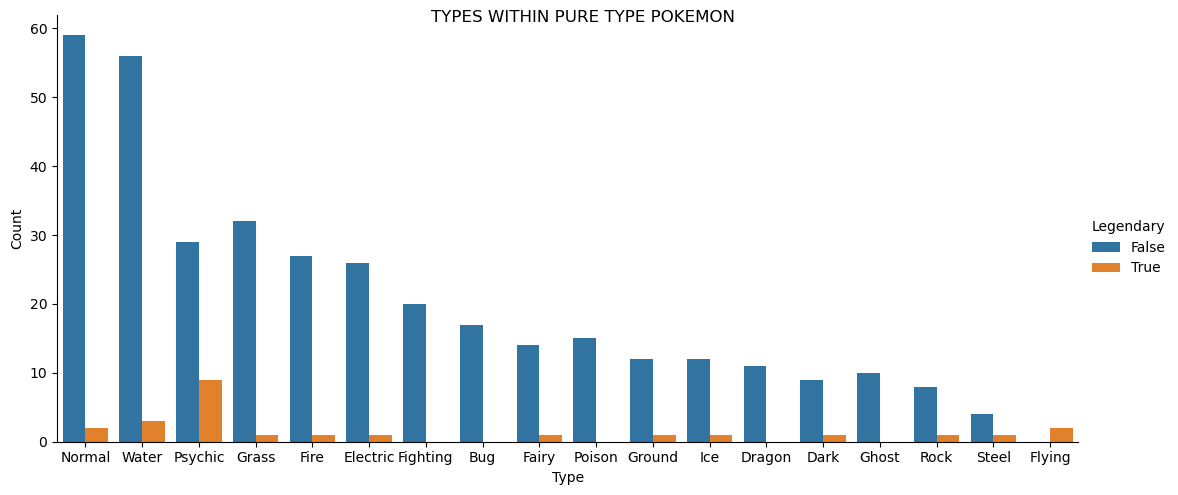

In [223]:
#Graph of Different Types within the Pure Type Pokemon
pure_types = sns.catplot(data = df.loc[df['Type'] == 'Pure Type'], x = 'Type 1', order = df.loc[df['Type'] == 'Pure Type', 'Type 1'].value_counts().index, hue = 'Legendary', kind = 'count', aspect = 2.2)

pure_types.figure.suptitle('TYPES WITHIN PURE TYPE POKEMON')
pure_types.set_axis_labels('Type', 'Count')

Text(0.5, 0.98, 'TYPES WITHIN DUAL TYPE POKEMON')

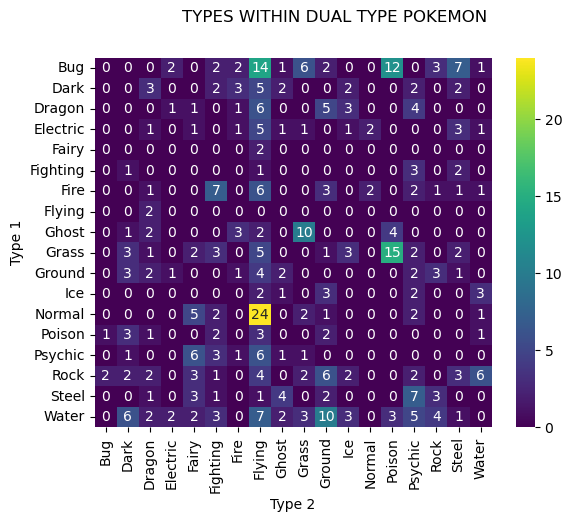

In [224]:
#Graph of Different Types within the Dual Type Pokemon

#Temp dataframe for 
dual_pokemon = df.loc[df['Type'] == 'Dual Type']

#Creating cross table for heatmap
crosstable = pd.crosstab(dual_pokemon['Type 1'], dual_pokemon['Type 2'])

#Plotting heatmap
dual_types = sns.heatmap(crosstable, annot = True, cmap = 'viridis', fmt = 'd')

dual_types.figure.suptitle('TYPES WITHIN DUAL TYPE POKEMON')

#### **VISUALIZING THE ATTACK OF POKEMON**

Text(0.5, 0.98, 'ATTACK OF PURE AND DUAL TYPE POKEMON')

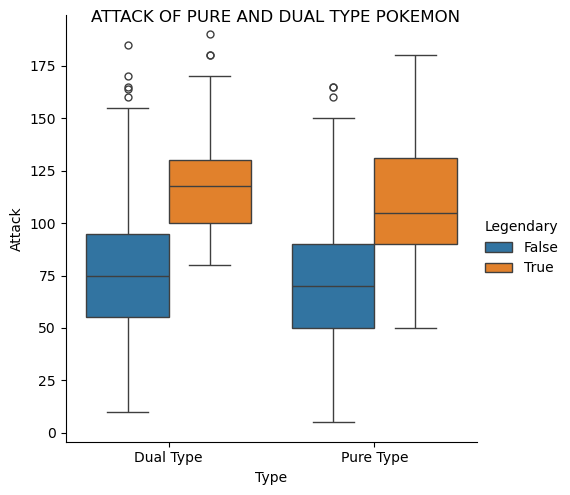

In [225]:
#General Attack of Pure and Dual Type Pokemon
gen_at_plot = sns.catplot(data = df, x = 'Type', y = 'Attack', kind = 'box', hue = 'Legendary')
gen_at_plot.figure.suptitle('ATTACK OF PURE AND DUAL TYPE POKEMON')

Text(0.5, 0.98, 'ATTACK OF DIFFERENT TYPES OF PURE TYPE POKEMON')

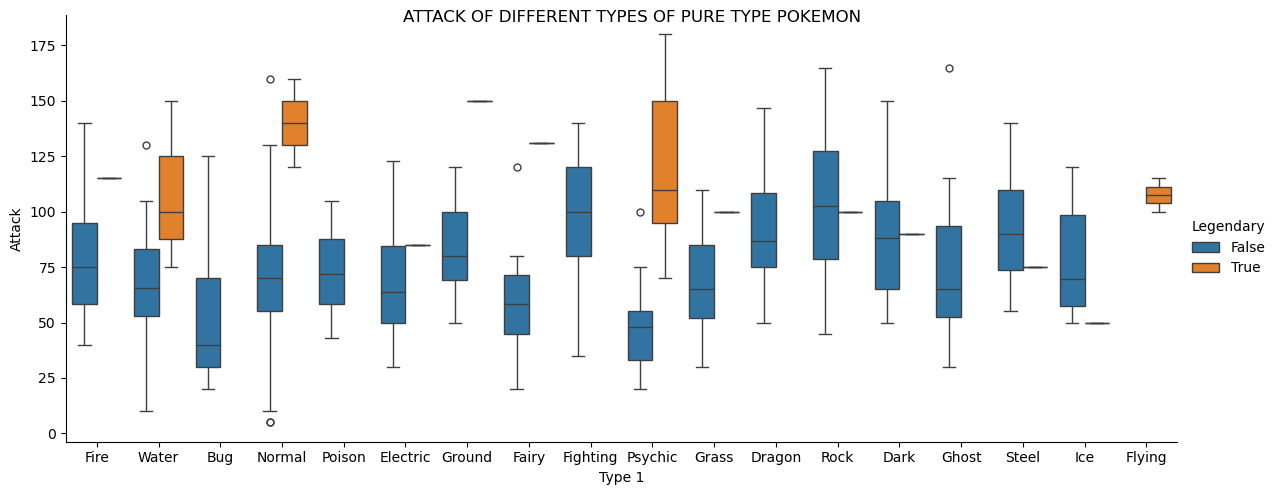

In [226]:
#Attack of Different Types within Pure Type Pokemon
pure_at_plot = sns.catplot(data = df.loc[df['Type'] == 'Pure Type'], x = 'Type 1', y = 'Attack', hue = 'Legendary', kind = 'box', aspect = 2.4)
pure_at_plot.figure.suptitle('ATTACK OF DIFFERENT TYPES OF PURE TYPE POKEMON')

Text(0.5, 0.98, 'ATTACK OF DIFFERENT TYPE 1 WITHIN DUAL TYPE POKEMON')

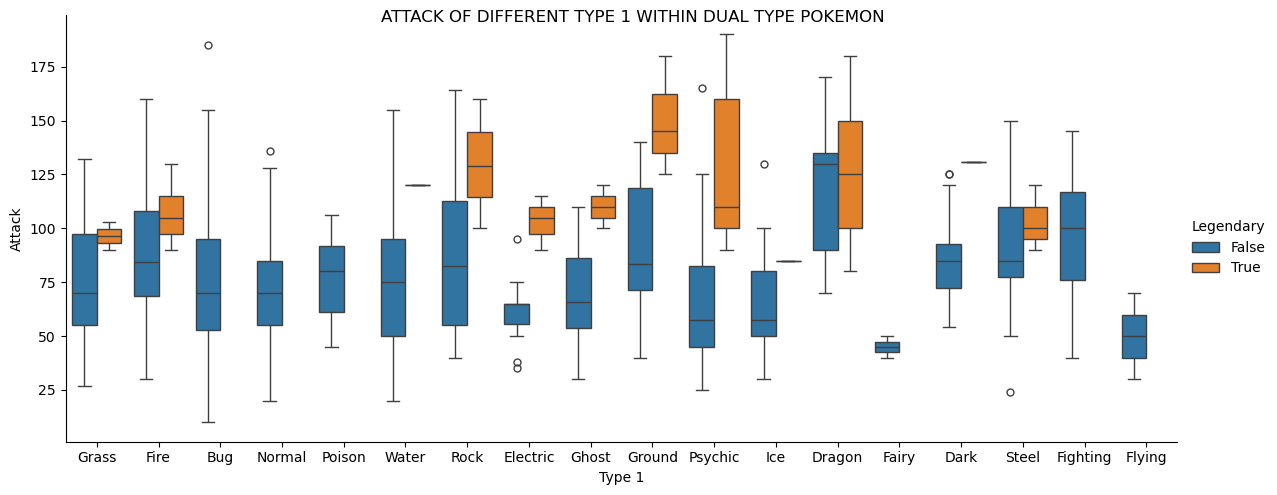

In [227]:
#Attack of Different Type 1 within Dual Type Pokemon
dual_at_plot_1 = sns.catplot(data = df.loc[df['Type'] == 'Dual Type'], x = 'Type 1', y = 'Attack', hue = 'Legendary', kind = 'box', aspect = 2.4)
dual_at_plot_1.figure.suptitle('ATTACK OF DIFFERENT TYPE 1 WITHIN DUAL TYPE POKEMON')

Text(0.5, 0.98, 'ATTACK OF DIFFERENT TYPE 2 WITHIN DUAL TYPE POKEMON')

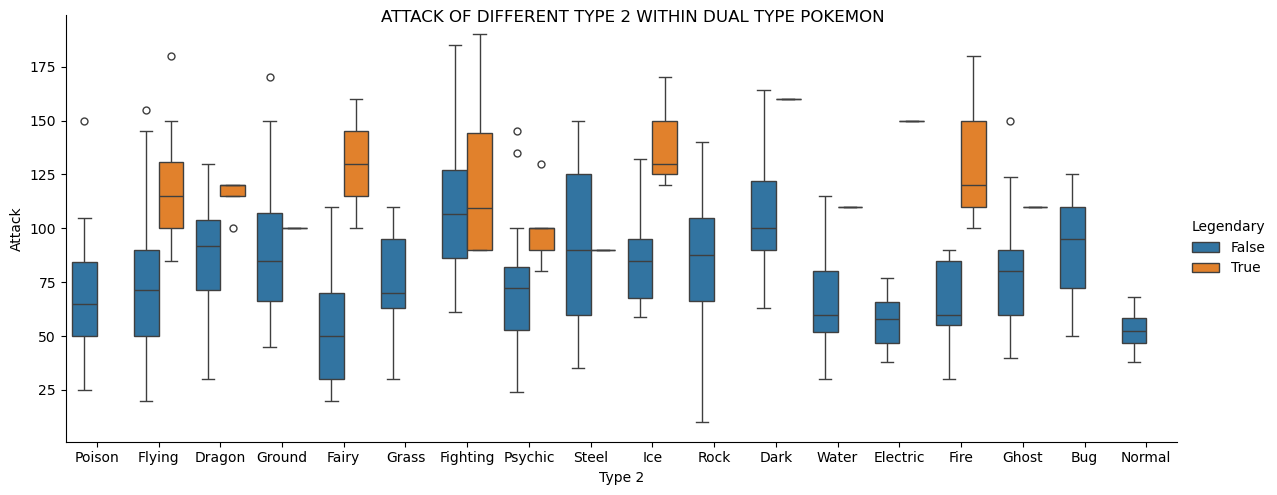

In [228]:
#Attack of Different Type 1 within Dual Type Pokemon
dual_at_plot_2 = sns.catplot(data = df.loc[df['Type'] == 'Dual Type'], x = 'Type 2', y = 'Attack', hue = 'Legendary', kind = 'box', aspect = 2.4)
dual_at_plot_2.figure.suptitle('ATTACK OF DIFFERENT TYPE 2 WITHIN DUAL TYPE POKEMON')

Text(0.5, 1.0, 'ATTACK OF DIFFERENT TYPE 2 WITHIN DUAL TYPE POKEMON')

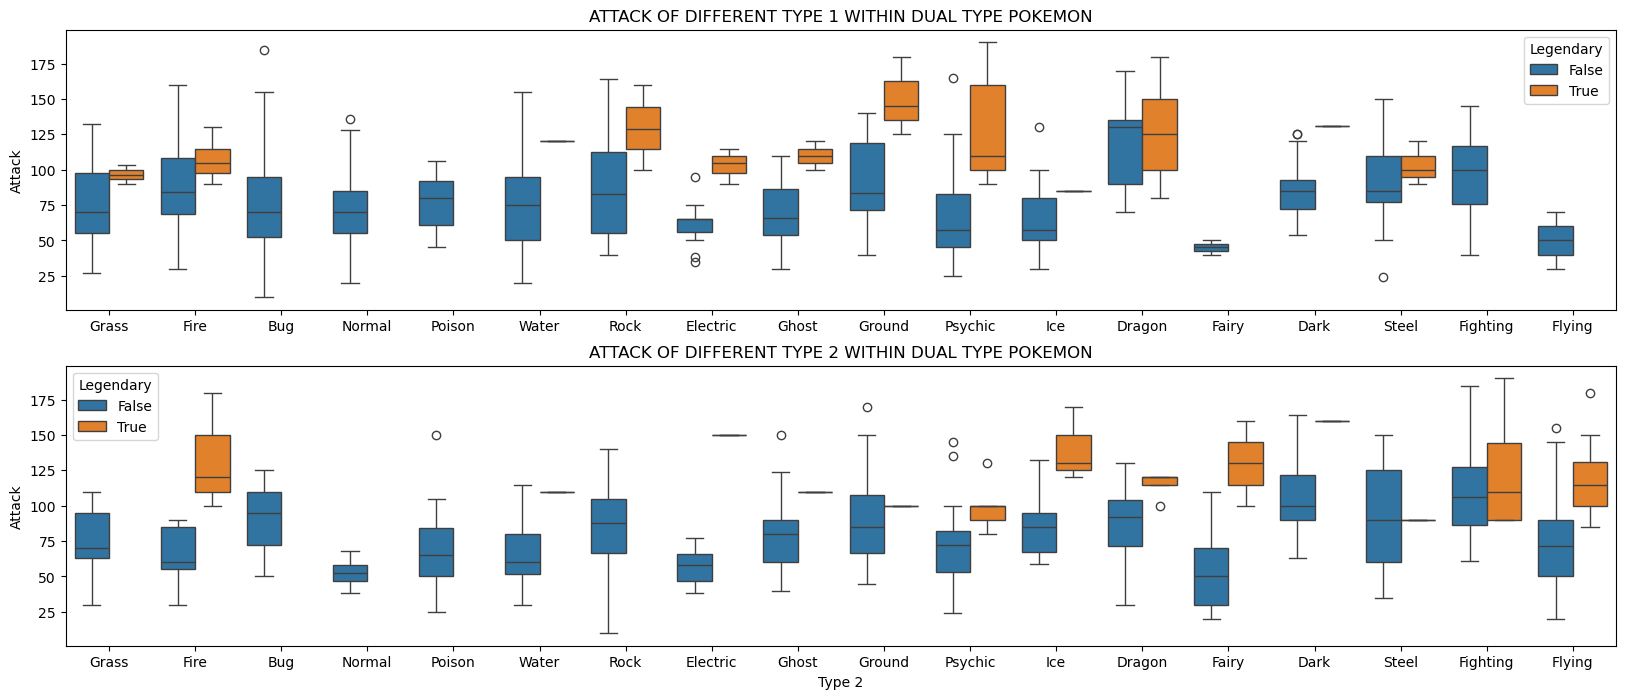

In [229]:
#General attack of Dual Type Pokemon
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
fig.set_figwidth(20)
fig.set_figheight(8)

dual_at_plot_1 = sns.boxplot(data = df.loc[df['Type'] == 'Dual Type'], x = 'Type 1', y = 'Attack', hue = 'Legendary', ax = ax1)
ax1.set_title('ATTACK OF DIFFERENT TYPE 1 WITHIN DUAL TYPE POKEMON')
ax1.tick_params(labelbottom=True)

dual_at_plot_2 = sns.boxplot(data = df.loc[df['Type'] == 'Dual Type'], x = 'Type 2', y = 'Attack', hue = 'Legendary', ax = ax2)
ax2.set_title('ATTACK OF DIFFERENT TYPE 2 WITHIN DUAL TYPE POKEMON')


# **CONTINUE HERE**

In [230]:
#Graph of defense, speed, ap. attack. sp. defense, HP, total wrt generation, legendary 

#### **VISUALIZING THE DEFENSE OF POKEMON**

#### **VISUALIZING THE SPEED OF POKEMON**

#### **VISUALIZING THE SP. ATTACK OF POKEMON**

#### **VISUALIZING THE SP. DEFENSE OF POKEMON**

#### **VISUALIZING THE HP OF POKEMON**

#### **VISUALIZING THE TOTAL WRT. GENERATION OF POKEMON**

In [231]:
#Graph of Different Types within the Dual Type Pokemon
# sns.catplot(data = df.loc[df['Type'] == 'Dual Type', ['Type 1', 'Type 2']].value_counts())

#x = 'Type 1', y = 'Type 2', kind = 'strip', height = 6, aspect = 2.2)
#order = df.loc[df['Type'] == 'Dual Type', 'Type 1'].value_counts().index, kind = 'count', aspect = 2.2)

# dtypes.set_titles('Dual Pokemon Types')
# dtypes.set_axis_labels('Type 1', 'Type 2')